#Black Friday Sales Prediction

- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

- Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

- https://datahack.analyticsvidhya.com/contest/black-friday/#ProblemStatement

- Description of data set is given in above link

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- importing all the required libraries and importing dataset from github account to saledf dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Saledf = pd.read_csv('/content/drive/MyDrive/BlackFridayPredictionClean.csv')

In [5]:
Saledf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,6,16,C,4,0,8,8.0,16.0,7969


- Checking Dataset and No of rows and columns

In [6]:
row, col = Saledf.shape
row, col

(550068, 12)

- Information about dataset

In [7]:
Saledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


# Summary of above output

- Above dataset contains 12 columns
- There are 5 columns are in integer datatype, 2 columns are in float datatype and 5 columns are in object datatype.
- Above dataset have 550068 entries.

# Checking for null values in dataset

In [8]:
Saledf.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
Saledf['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00167242       1
P00309642       1
P00107442       1
P00203242       1
P00307042       1
Name: Product_ID, Length: 3631, dtype: int64

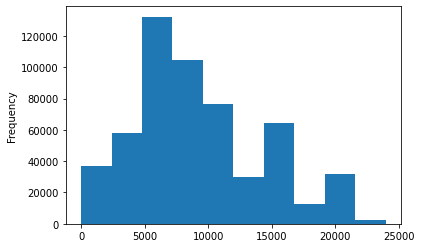

In [ ]:
Saledf['Purchase'].plot(kind='hist')

- maximum purchase amount was around 24000
- Maximum puchase amount in the range 2000 to 12000
- very few users purchased above 22000

In [13]:
help(Saledf['Gender'].value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True) method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.
    
    Returns
    -------
    Series
    
    See Also
 

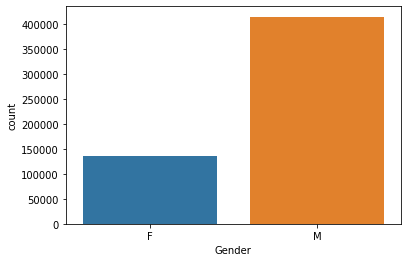

In [28]:
sns.countplot(data=Saledf,x='Gender')

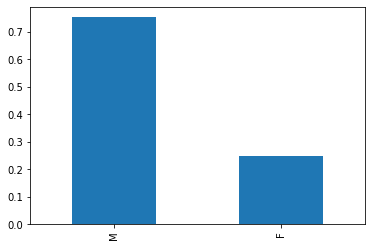

In [22]:
Saledf['Gender'].value_counts(normalize=True).plot.bar()

In [19]:
Saledf.groupby('Gender').mean()['Purchase']

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [20]:
sns.barplot?

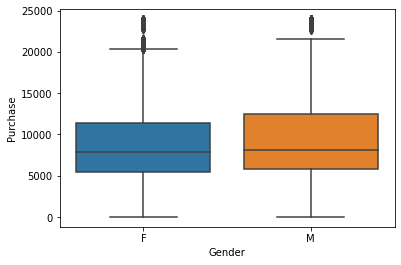

In [21]:
sns.boxplot(data=Saledf,x='Gender',y='Purchase')

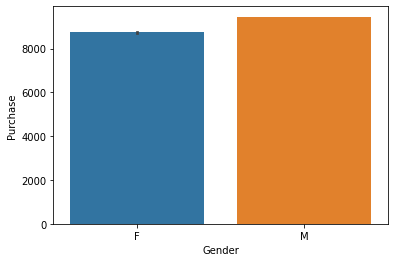

In [ ]:
sns.barplot(data=Saledf,x='Gender',y='Purchase')

- As per above graph Male users purchase amount is greater than female users
- both Male and Female users equally made purchase with small difference arount 2000

In [30]:
Saledf.groupby('Age').mean()['Purchase']

Age
0    8933.464640
1    9169.663606
2    9252.690633
3    9331.350695
4    9208.625697
5    9534.808031
6    9336.280459
Name: Purchase, dtype: float64

In [39]:
tempdf = Saledf.groupby('Age').mean()['Purchase']
tempdf.apply(lambda x: x/tempdf.max())

Age
0    0.936932
1    0.961704
2    0.970412
3    0.978662
4    0.965790
5    1.000000
6    0.979179
Name: Purchase, dtype: float64

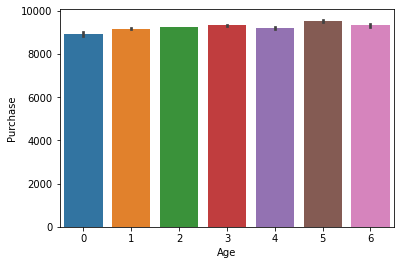

In [ ]:
sns.barplot(data=Saledf,x='Age',y='Purchase')

- here all the age groups purchase amount equally distributed approx
- max amount made by all groups around 9000

In [44]:
Saledf.groupby('Occupation').mean()['Purchase'].sort_values()

Occupation
9     8637.743761
19    8710.627231
20    8836.494905
2     8952.481683
1     8953.193270
10    8959.355375
0     9124.428588
18    9169.655844
3     9178.593088
11    9213.845848
4     9213.980251
6     9256.535691
13    9306.351061
5     9333.149298
16    9394.464349
7     9425.728223
14    9500.702772
8     9532.592497
15    9778.891163
12    9796.640239
17    9821.478236
Name: Purchase, dtype: float64

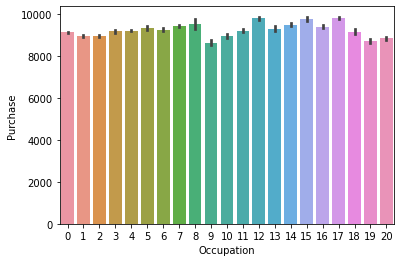

In [ ]:
sns.barplot(data=Saledf,x='Occupation',y='Purchase')

- here all the occupation group purchas made approx equally
- occupation 9 and 18,20 are less purchased amount compare to others

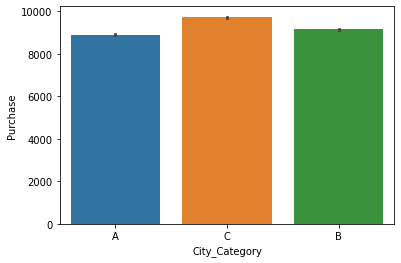

In [ ]:
sns.barplot(data=Saledf,x='City_Category',y='Purchase')

- city C purchase amount is high around 9000
- city A and B are purchase amount approx same


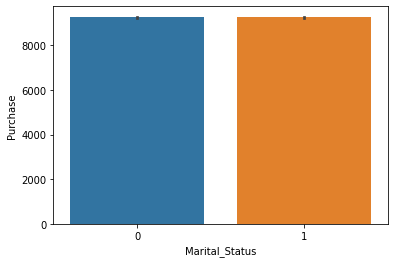

In [ ]:
sns.barplot(data=Saledf,x='Marital_Status',y='Purchase')

- both married and singles purchased same amount

In [ ]:
Saledf[Saledf['Purchase']==0]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [ ]:
Saledf['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
6960     183
        ... 
15105      1
14384      1
10453      1
8537       1
14640      1
Name: Purchase, Length: 18105, dtype: int64

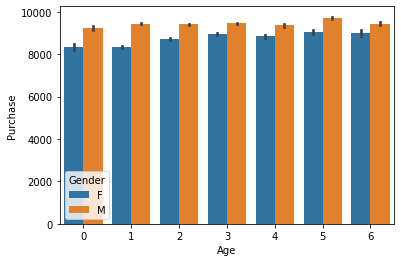

In [ ]:
sns.barplot(data=Saledf,x='Age',y='Purchase',hue='Gender')

- Male users of all ages purchased more compare to females

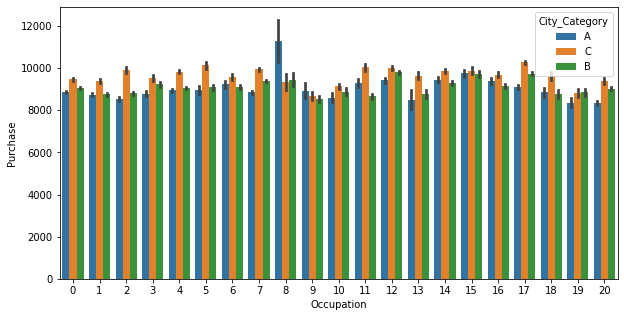

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=Saledf,x='Occupation',y='Purchase',hue='City_Category')

- here city C of all occupation users purchase more compare to others
- but occupation 8 users in city A have highest purchased it looks outlier


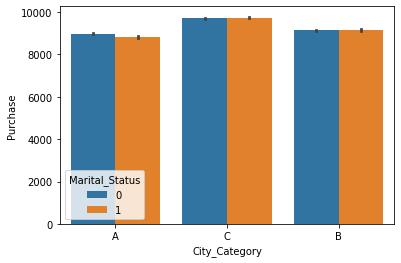

In [ ]:
sns.barplot(data=Saledf,x='City_Category',y='Purchase',hue='Marital_Status')

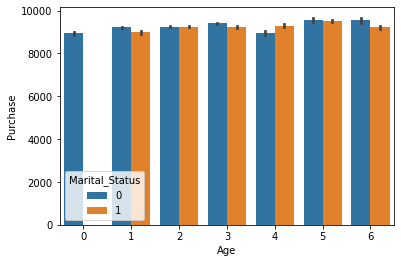

In [ ]:
sns.barplot(data=Saledf,x='Age',y='Purchase',hue='Marital_Status')

- here all city singles and married people puchased with same amount
- but married users of age 0 are dint purchased any of the product


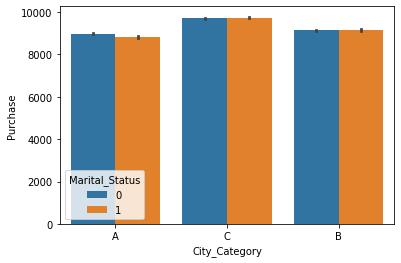

In [ ]:
sns.barplot(data=Saledf,x='City_Category',y='Purchase',hue='Marital_Status')

#1. The Purchase amount from the city A female users has been increased.


#2. Male Users of age 25 to 35 staying in cityB for since 6 years are software developers 

# 1. Most of the Female users of age 18 to 25 buy pruduct P00069042 in product category1

In [ ]:
#dfProd = Saledf[(Saledf['Product_ID']=="P00069042") & (Saledf['Gender']=='F') & (Saledf['Age']== 1)]
dfProd = Saledf[(Saledf['Product_ID']=="P00069042")][['User_ID','Product_ID','Gender','Age','Product_Category_1']]
dfProd.head()

,User_ID,Product_ID,Gender,Age,Product_Category_1
0,1000001,P00069042,F,0,3
825,1000149,P00069042,M,2,3
3314,1000541,P00069042,F,1,3
4224,1000698,P00069042,M,1,3
5864,1000951,P00069042,M,4,3


In [ ]:
Group = dfProd.groupby(['Gender','Age']).agg({'User_ID':'count'})
Group

User_ID
Gender Age         
F      0          3
       1         12
       2         18
       3         16
       4          4
       5          5
       6          2
M      0          1
       1         30
       2         72
       3         36
       4         14
       5          9
       6          5

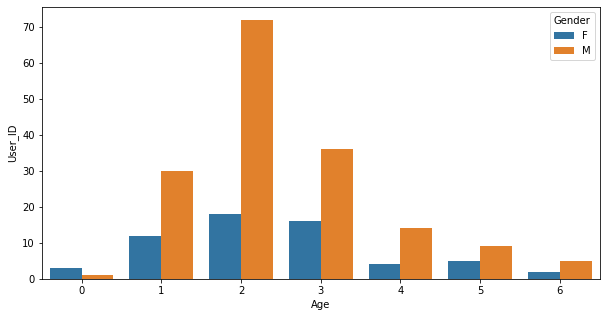

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=Group.reset_index(),x='Age',y='User_ID',hue='Gender')

- Inference from above Graph
- 12 female users bought Product P00069042 from category 1
- more number of male users bought product P00069042 from category 1 from age 18 to 25
- so above hypothesis is false.

# Users staying in city A of age 26 to 35 who are working as software(15)  will buy more products from product category 2 of 15.

In [ ]:
dfcat2 = Saledf[(Saledf['Product_Category_2']==15.0)& (Saledf.Occupation==15)][['User_ID','Product_ID','City_Category','Age','Occupation','Product_Category_2']]
dfcat2.head()

,User_ID,Product_ID,City_Category,Age,Occupation,Product_Category_2
2337,1000366,P00117942,B,5,15,15.0
2569,1000412,P00052842,A,3,15,15.0
2573,1000412,P00165442,A,3,15,15.0
2576,1000412,P00065342,A,3,15,15.0
5748,1000929,P00329542,A,2,15,15.0


In [ ]:
Groupcat = dfcat2.groupby(['City_Category','Age']).agg({'User_ID':'count','Product_ID':'count'})
Groupcat

User_ID  Product_ID
City_Category Age                     
A             1         21          21
              2        179         179
              3         20          20
              5          1           1
              6          1           1
B             1         12          12
              2        229         229
              3        114         114
              4         15          15
              5         44          44
              6          9           9
C             1         41          41
              2         98          98
              3         89          89
              4         41          41
              5         15          15
              6         11          11

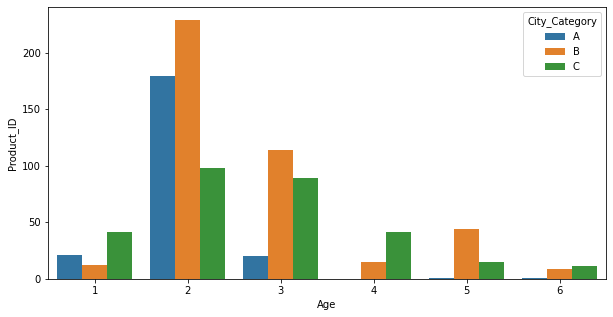

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=Groupcat.reset_index(),x='Age',y='Product_ID',hue='City_Category')

#Users who are married of age 45 above are staying in city A for around 15 yrs have more experience in work so they like product P00085442 in category 3

In [ ]:
dfProdcat = Saledf[(Saledf['Product_ID']=="P00085442")][['User_ID','Product_ID','Age','Marital_Status','Stay_In_Current_City_Years','City_Category','Product_Category_3']]
dfProdcat.head()

,User_ID,Product_ID,Age,Marital_Status,Stay_In_Current_City_Years,City_Category,Product_Category_3
3,1000001,P00085442,0,0,2,A,16.0
322,1000053,P00085442,2,0,1,B,16.0
973,1000169,P00085442,2,0,3,B,16.0
2024,1000323,P00085442,4,0,1,C,16.0
11978,1001796,P00085442,5,1,2,C,16.0


In [ ]:
groupcity = dfProdcat.groupby(['City_Category','Marital_Status']).agg({'User_ID':'count'})
groupcity.head()

User_ID
City_Category Marital_Status         
A             0                    40
              1                    40
B             0                    75
              1                    74
C             0                    56

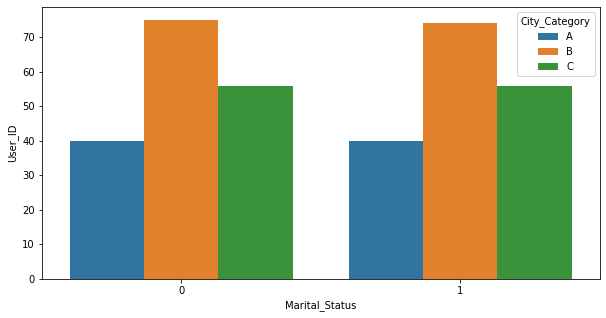

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=groupcity.reset_index(),x='Marital_Status',y='User_ID',hue='City_Category')

- city B has more no of married persons from above graph.
- city A has less no of married persons.


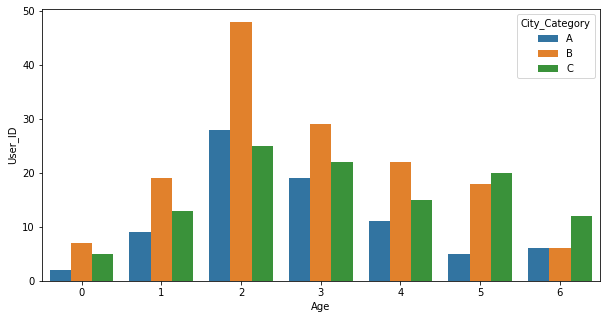

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=dfProdcat.groupby(['City_Category','Age']).agg({'User_ID':'count'}).reset_index(),x='Age',y='User_ID',hue='City_Category')

- city C has more no of users of aged 55 and above
- city A & B has equal no of users of aged 55 and above

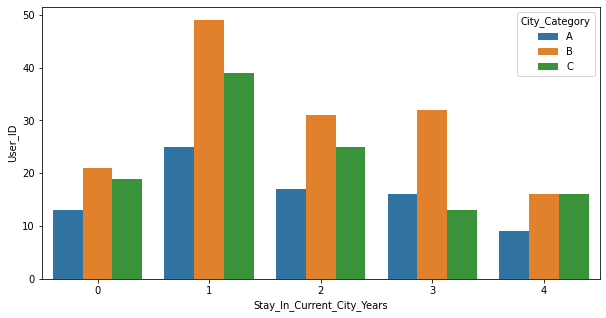

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=dfProdcat.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'User_ID':'count'}).reset_index(),x='Stay_In_Current_City_Years',y='User_ID',hue='City_Category')

- city B & C has equal no of users who are staying in same area more than 4 years.
- they are the senior peoples in this area.

- conclusion: so as per above graphs we can say that city B has more no of married peoples of aged 55 and above staying since 15 years.

# City B has more kids garden so users stay here are married people, they want to buy products from category 2 of section 11, 17, 18.

In [ ]:
dfkids = Saledf[(Saledf.Product_Category_2 == 11) | (Saledf.Product_Category_2 == 17) | (Saledf.Product_Category_2 == 18)]
dfkids.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
10,1000005,P00251242,M,2,20,A,1,1,5,11.0,16.0,5254
30,1000010,P00118742,F,3,1,B,4,1,5,11.0,16.0,8886
38,1000010,P00155442,F,3,1,B,4,1,1,11.0,15.0,15212
47,1000011,P00192642,F,2,1,C,1,0,8,17.0,16.0,6171
55,1000014,P00276642,M,3,0,C,0,0,8,11.0,16.0,5848


In [ ]:
groupkids = dfkids.groupby(['Marital_Status','City_Category']).agg({'User_ID':'count','Product_ID':'count'})
groupkids.head()

User_ID  Product_ID
Marital_Status City_Category                     
0              A                 4780        4780
               B                 7460        7460
               C                 5441        5441
1              A                 2928        2928
               B                 5289        5289

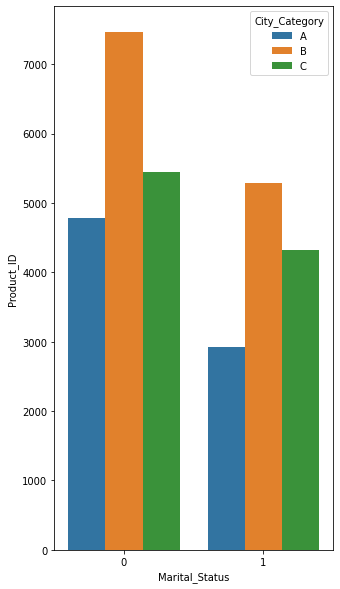

In [ ]:
plt.figure(figsize=(5,10))
sns.barplot(data=groupkids.reset_index(),x='Marital_Status',y='Product_ID',hue='City_Category')

- From the above graph city B has more no of married people who bought highest products from product category 11,17,18

In [ ]:
agekids = dfkids[(dfkids.City_Category == 'B')]
agekids.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
30,1000010,P00118742,F,3,1,B,4,1,5,11.0,16.0,8886
38,1000010,P00155442,F,3,1,B,4,1,1,11.0,15.0,15212
209,1000036,P00120842,M,2,3,B,0,0,8,17.0,16.0,9894
236,1000044,P00120342,M,4,17,B,3,1,5,17.0,16.0,7179
278,1000048,P00182442,M,2,4,B,3,1,5,11.0,16.0,5252


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


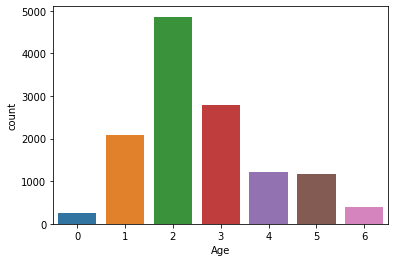

In [ ]:
sns.countplot(agekids.Age)

- City B has less number of kids ie less than 200.

# City A & C has many gyms, users staying here prefered products from product category 2 & 3 of common item sections 10, 13 in every quarter

In [ ]:
dfgym = Saledf[(Saledf.Product_Category_2 == 10) | (Saledf.Product_Category_2 == 13) | (Saledf.Product_Category_3 == 10) | (Saledf.Product_Category_3 == 13)]

In [ ]:
dfgym.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
44,1000010,P00148642,F,3,1,B,4,1,6,10.0,13.0,12642
49,1000011,P00189642,F,2,1,C,1,0,8,13.0,16.0,8027
76,1000018,P00222242,F,1,3,B,3,0,1,2.0,13.0,15182
82,1000018,P00158542,F,1,3,B,3,0,5,6.0,13.0,5430
172,1000033,P00344242,M,4,3,A,1,1,8,10.0,16.0,4035


In [ ]:
groupgym = dfgym.groupby(['City_Category']).agg({'Product_ID':'count'})
groupgym.head()

,Product_ID
City_Category,
A,5135
B,7821
C,6222


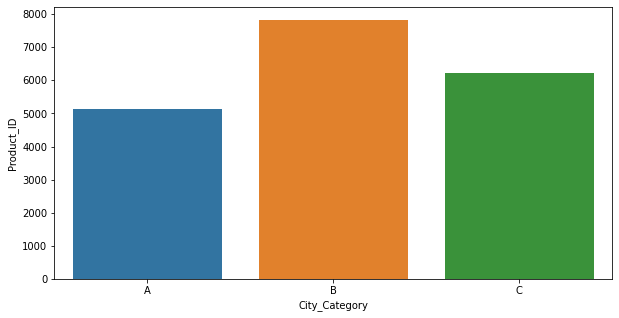

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=groupgym.reset_index(),x='City_Category',y='Product_ID')